# Density Operators

The primary references for this notebook are Chapter 29 $\S 3$ of Roger Penrose's ["The Road to Reality"](https://www.amazon.com/Road-Reality-Complete-Guide-Universe/dp/0679776311), and Chapter 2 $\S 4$ of Nielsen & Chuang's ["Quantum Computation and Quantum Information"](https://www.amazon.com/Quantum-Computation-Information-10th-Anniversary/dp/1107002176).

In [1]:
import numpy as np
from qiskit import *
%matplotlib inline

### Bell State Example

**Density matrices** are an alternate way of representing the state of a quantum system. In the finite dimensional case, for example with a finite number of qubits, suppose we have some set of possible states the system can be in $|\psi_k\rangle$, each with probability $p_k$. We call the set $\{p_k, |\psi_k\rangle\}$ an *ensemble of states*. As an example, suppose we prepare the Bell state 

\begin{align}
\beta_{00} = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
\end{align}

using the following circuit:

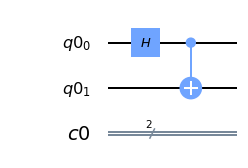

In [2]:
qr00 = QuantumRegister(2)
cr00 = ClassicalRegister(2)
Bell00 = QuantumCircuit(qr00, cr00)
Bell00.h(0)
Bell00.cx(0,1)
Bell00.draw(output='mpl')

Let's verify the state vector is in fact $\beta_{00}$ using the `statevector_simulator` backend to print out the state vector obtained from the circuit as a column (ket) vector.  

In [3]:
backend = Aer.get_backend('statevector_simulator') 
beta00 = execute(Bell00,backend).result().get_statevector()
print(np.matrix(beta00).H)

[[0.70710678-0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.70710678-0.j]]


Notice, we can rewrite this as

\begin{align}
\frac{|00\rangle + |11\rangle}{\sqrt{2}} &= \frac{1}{\sqrt{2}}|00\rangle + \frac{1}{\sqrt{2}}|11\rangle \\
&= |\psi_1\rangle + |\psi_2\rangle
\end{align}

where 

\begin{align}
|\psi_1\rangle &= \frac{1}{\sqrt{2}}|00\rangle \\
|\psi_2\rangle &= \frac{1}{\sqrt{2}}|11\rangle.
\end{align}

Now, the amplitude of $|00\rangle$ is $1/\sqrt{2}$. The amplitude of $|11\rangle$ is also $1/\sqrt{2}$. So, both $|\psi_1\rangle$ and $|\psi_2\rangle$ occur with probability $p_1 = p_2 = (1/\sqrt{2})^2 = 1/2$. In general we define the density matrix of an ensemble of state $\{p_k, |\psi_k\rangle\}$ as

\begin{align}
\rho = \sum_{k=1}^n p_k |\psi_k\rangle \langle \psi_k|.
\end{align}

In this example for the Bell state $\beta_{00}$ this becomes

\begin{align}
\rho_{00} &= \frac{1}{2}|\psi_1\rangle \langle \psi_1| + \frac{1}{2}|\psi_2\rangle \langle \psi_2| \\
&= \frac{1}{2}|00\rangle \langle 00| + \frac{1}{2}|11\rangle \langle 11| \\
&= \frac{1}{2}
\begin{pmatrix}
1 \\ 0 \\ 0 \\ 0
\end{pmatrix}
\begin{pmatrix}
1, & 0, & 0, & 0
\end{pmatrix} +
\frac{1}{2}
\begin{pmatrix}
0 \\ 0 \\ 0 \\ 1
\end{pmatrix}
\begin{pmatrix}
0, &0, &0, & 1
\end{pmatrix}\\
&= \frac{1}{2} 
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0
\end{pmatrix} + 
\frac{1}{2}
\begin{pmatrix}
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1
\end{pmatrix} \\
&= \begin{pmatrix}
1/2 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1/2
\end{pmatrix}.
\end{align}

We can check this in Python as follows. 

In [4]:
# Define spin-up ket |0>
u = np.matrix([[1],
               [0]])

#Define spin-down ket |1>
d = np.matrix([[0],
               [1]])

# Define |00>
uu = np.kron(u,u)

# Define |11>
dd = np.kron(d,d)

In [5]:
#Compute outer product of spin-up ket and spin-up bra
p1 = np.dot(uu, uu.H)/2
print(p1)

[[0.5 0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]]


In [6]:
#Compute outer product of spin-down ket and spin-down bra
p2 = np.dot(dd, dd.H)/2
print(p2)

[[0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.5]]


In [7]:
# Compute the density matrix
rho00 = p1+p2
print(rho00)

[[0.5 0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0. ]
 [0.  0.  0.  0.5]]


### Some Remarks on Ontology

As a more basic example, and as a way of getting at a certain ontology of quantum mechanics, let's look at an even more basic example, the case of a single qubit (or spin-$1/2$ particle). In this case, we know from previous experience that there are many different bases we can measure in. There are in fact *infinitely many* bases we can measure in. Typically we measure in either the Pauli bases, $X$, $Y$, and $Z$, which correspond to the matrices

\begin{align}
X = 
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix}, \quad 
Y = 
\begin{pmatrix}
0 & -i \\
i & 0
\end{pmatrix}, \quad 
Z = 
\begin{pmatrix}
1 & 0 \\
0 & -1
\end{pmatrix}.
\end{align}

We know these correspond (respectively) to the state vectors

\begin{align}
\frac{|0\rangle + |1\rangle}{\sqrt{2}}, &\quad \frac{|0\rangle - |1\rangle}{\sqrt{2}} \\
\frac{|0\rangle + i|1\rangle}{\sqrt{2}}, &\quad \frac{|0\rangle - i|1\rangle}{\sqrt{2}} \\
|0\rangle, &\quad |1\rangle .
\end{align}

In more compact notation this is written

\begin{align}
|+\rangle, &\quad |-\rangle \\
|l\rangle, &\quad |r\rangle \\
|0\rangle, &\quad |1\rangle .
\end{align}

Using this notation, we can define three different density matrices, 

\begin{align}
\rho_X &= \frac{1}{2}|+\rangle \langle +| + \frac{1}{2}|- \rangle \langle -| \\
\rho_Y &= \frac{1}{2}|l\rangle \langle l| + \frac{1}{2}|r \rangle \langle r| \\
\rho_Z &= \frac{1}{2}|0\rangle \langle 0| + \frac{1}{2}|1 \rangle \langle 1|.
\end{align}

Now, you should take a moment to verify by hand that these three density matrices are all the same! For two *orthogonal* state, this will always be the case. Once you've done that, let's check in Python that $\rho_X = \rho_Y = \rho_Z$. First, let's define all of the state vectors we need. 

In [8]:
# spin-up (Z-basis)
u = np.matrix([[1],
               [0]])

# spin-down (Z-basis)
d = np.matrix([[0],
               [1]])

#spin-plus (Y-basis)
p = (u + 1j*d)/(np.sqrt(2))

# spin-minus (Y-basis)
m = (u - 1j*d)/(np.sqrt(2))

#spin-left (X-basis)
l = (u + d)/(np.sqrt(2))

#spin-right (X-basis)
r = (u - d)/(np.sqrt(2))

Now, let's define the three density matrices.

In [9]:
# Density operator for Z-basis
rhoZ = np.dot(u, u.H)/2 + np.dot(d, d.H)/2

# Density operator for X-basis
rhoX = np.dot(p, p.H)/2 + np.dot(m, m.H)/2

# Density operator for Y-basis
rhoY = np.dot(l, l.H)/2 + np.dot(r, r.H)/2

Now, let's check to see if these three matrices are equal. 

In [10]:
print(rhoZ)

[[0.5 0. ]
 [0.  0.5]]


In [11]:
print(rhoX)

[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


In [12]:
print(rhoY)

[[0.5 0. ]
 [0.  0.5]]


Visual inspection verifies that they are indeed all equal. We can also run a [test](https://docs.scipy.org/doc/numpy/reference/generated/numpy.testing.assert_almost_equal.html) to check equality within some error tolerance, which is necessary (`==` will not be sufficient due to the complex entries in `rhoX`). The format for this test is 

`np.testing.assert_almost_equal(actual, desired, decimal=7, err_msg='', verbose=True)`

To see that `==` is insufficient, let's try it. 

In [13]:
rhoZ==rhoX

matrix([[False,  True],
        [ True, False]])

In [14]:
rhoY==rhoZ

matrix([[False,  True],
        [ True, False]])

Now, let's use the test function. 

In [15]:
np.testing.assert_almost_equal(rhoZ, rhoX, decimal=6, verbose=True)
np.testing.assert_almost_equal(rhoY, rhoZ, decimal=6, verbose=True)

No output means the test was passed and the two are equal up to six decimal places. In Chapter 29 $\S 5$, Roger Penrose discusses how this kind of behavior of density matrices calls into question the validity of the "*environmental decoherence*" interpretation of quantum physics. In particular, the issue of having multiple states correspond to the same density matrix is useful when the environment is incredibly complicated, however the density matrix formalism makes distinguishing relative phase factors impossible and it also conflates many possible states. Some do take the density matrix to be "*true reality*" though and  dispute trying to distinguish the various states that could lead to the same density matrix. Moreover, there may be cases where phase factors might get lost at a small enough scale, such as at the Planck length of $10^{-33}cm$ or at $10^{-43}s$ at the Plack scale of time. At such small scales, gravitational effects may cause loss of phase factors. 

We may use the following criteria to determine when two sets of state vectors result in the **same** desnity operator:

Let $\{|\psi_i\rangle \}$ and $\{|\phi_j\rangle \}$ be two sets of state vectors, which are not necessarily the same size, and which are *not* assumed to be normalized to unit length. Pad whichever set is smaller with additonal $0$ vectors so that the two sets are of the same size. Then these two sets of vectors lead to the same density operator if and only if

\begin{align}
|\psi_i\rangle = \sum_j u_{ij} |\phi_j\rangle, 
\end{align}

where $u_{ij}$ is a unitary matrix of complex numbers. 

### Pure State, Mixed States, and more Ontology

The fact that all of these density matrices are equal is an interesting property of density matrices. They combine classical probability with the probabilities obtained from complex amplitudes using the [Born rule](https://en.wikipedia.org/wiki/Born_rule), which says the probability of measuring a particular state is the norm of the amplitude of the state vector. This sometimes is interpreted as meaning that density matrices are more fundamental, or should be considered base reality, over the state vector description. When the word "*state*" is used in the density matrix sense, we use **pure state** to mean a state of the form $|\psi \rangle \langle \psi|$. A **mixed state** is a density matrix state that cannot be written in this way. A Bell state would be an example of a *mixed state*, and the three examples we just covered for a single qubit would all be examples of *pure states*. We may also use the following condition to determine if a state is pure:

For a density operator $\rho$, we have $Tr(\rho^2) \leq 1$, with equality **if and only if** $\rho$ is a **pure state**. 

In the density matrix formalism, if we have a state vector $e^{i \theta}|\psi\rangle$, then

\begin{align}
e^{i \theta}|\psi\rangle \langle \psi |e^{-i \theta} = |\psi\rangle \langle \psi |, 
\end{align}

since $e^{i \theta}e^{-i \theta} = 1$, and so "*global phase factors*" of the form $e^{i \theta}$ are often disregarded, since in the density matrix formalism they go away. In this way, the density matrix $|\psi \rangle \langle \psi |$ is seen as equivalent to the state vector $|\psi \rangle$ "up to a phase factor". However, the phase factor $e^{i \theta}$ is only unobservable if the state of the entire system is described by $|\psi\rangle$. If on the other hand $|\psi\rangle$ only describes a subsystem of the total system under consideration, the "*relative*" phase factors between the various state vectors is important and must be kept track of. 

### Relation to the Bloch Sphere

The solid ball $B^3$ inside three dimensional Euclidean space can be used to represent the density matrices corresponding to all mixed and pure states of a $2$-state system such as a qubit. The boundary of this ball is what we have been calling the **Bloch sphere**. A general $2 \times 2$ Hermitian matrix with trace equal to $1$ is, 

\begin{align}
\frac{1}{2}
\begin{pmatrix}
1+a & b+ic \\
b-ic & 1-a
\end{pmatrix}, 
\end{align}

with $a, b, c \in \mathbb{R}$ real numbers. For this to be a density matrix we must have 

\begin{align}
a^2 + b^2 + c^2 \leq 1. 
\end{align}

The boundary, given by matrices with 

\begin{align}
a^2 + b^2 + c^2 = 1
\end{align}

is the space of *pure states*, and can be identified with the **Riemann sphere**. Let's look at another possible density matrix for a $2$-state system such as a qubit. 

Suppose we have the density matrix

\begin{align}
\rho &= \frac{1}{3}|l\rangle \langle l| + \frac{2}{3}|0\rangle \langle 0| \\
&= \frac{1}{3} 
\begin{pmatrix}
1/2 & 1/2 \\
1/2 & 1/2
\end{pmatrix} + 
\frac{2}{3}
\begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix} \\
&= 
\begin{pmatrix}
5/6 & 1/6 \\
1/6 & 1/6
\end{pmatrix}.
\end{align}

Let's check this in Python. 

In [16]:
L = np.dot(l, l.H)
U = np.dot(u, u.H)
rho_LU = L/3 + 2*U/3
print(rho_LU)

[[0.83333333 0.16666667]
 [0.16666667 0.16666667]]


Note that these two state $|l\rangle$ and $|0\rangle$ are not orthogonal to each other. 

### GHZ-State Example

As another example, let's compute the density matrix for the GHZ-state, 

\begin{align}
|GHZ_3\rangle = \frac{|000\rangle + |111\rangle}{\sqrt{2}}.
\end{align}

This state can be prepared using the following circuit:

In [17]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
GHZ = QuantumCircuit(qr, cr)

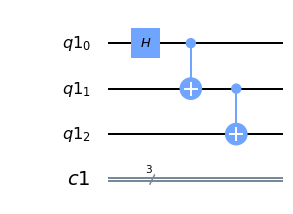

In [18]:
GHZ.h(0)
GHZ.cx(0,1)
GHZ.cx(1,2)
GHZ.draw(output='mpl')

Now, let's run the circuit on the `statevector_simulator` backend and print the resulting state vector as a column (ket) vector. 

In [19]:
backend = Aer.get_backend('statevector_simulator') 
GHZ_state = execute(GHZ,backend).result().get_statevector()
print(np.matrix(GHZ_state).H)

[[0.70710678-0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.        -0.j]
 [0.70710678-0.j]]


We can express this as an ensemble of states, 

\begin{align}
\rho_{GHZ} = \sum_{k=1}^2 p_k|\psi_k\rangle \langle \psi_k|
\end{align}

where 

\begin{align}
|\psi_1\rangle &= |000\rangle \\
|\psi_2\rangle &= |111\rangle, 
\end{align}

and the probabilities are $p_1 = p_2 = (1/\sqrt{2})^2 = 1/2$. In this case we get

\begin{align}
\rho_{GHZ} &= \frac{1}{2}|000\rangle \langle 000| + \frac{1}{2}|111\rangle \langle 111| \\
&= \frac{1}{2}
\begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0
\end{pmatrix} + 
\frac{1}{2}
\begin{pmatrix}
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{pmatrix}\\
&= 
\begin{pmatrix}
1/2 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1/2
\end{pmatrix}.
\end{align}

We can check this in Python as follows, 

In [20]:
# Define spin-up ket |0>
u = np.matrix([[1],
               [0]])

#Define spin-down ket |1>
d = np.matrix([[0],
               [1]])

# Define |00>
uu = np.kron(u,u)

# Define |11>
dd = np.kron(d,d)

# Define |000>
uuu = np.kron(u, uu)

#Define |111>
ddd = np.kron(d, dd)

In [21]:
# Define the outer product (1/2)|000><000|
P1 = np.dot(uuu, uuu.H)/2
print(P1)

[[0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]]


In [22]:
# Define the outer product (1/2)|111><111|
P2 = np.dot(ddd, ddd.H)/2
print(P2)

[[0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5]]


In [23]:
# Define the density matrix
rho = P1+P2
print(rho)

[[0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5]]


## Unitary Evolution

When we describe how a quantum system evolves over time, we generally use *unitary* operators. In the circuit diagram notation, gates can always be represented by unitary matrices. Suppose the unitary matrix $U$ describes how a system evolves. Then, in the density matrix notation this take each state $|\psi_k\rangle$ with probability $p_k$, to the state $U|\psi_k\rangle$ with probability $p_k$. This changes the density matrix as follows, 

\begin{align}
\rho = \sum_k p_k |\psi_k\rangle \langle \psi_k| &\to \sum_k p_i U|\psi_k\rangle \langle \psi_k|U^{\dagger}\\
&= U\rho U^{\dagger}.
\end{align}

As an example, let's take the Bell state $\beta_{00}$ and allow the unitary operator $X_0Y_1 = X \otimes Y$ to operator on the state $\beta_{00}$. This can be represented mathematically as,

\begin{align}
(X \otimes Y)\frac{|00\rangle + |11\rangle}{\sqrt{2}} &= 
\begin{pmatrix}
0 & 1 \\
1 & 0
\end{pmatrix} \otimes 
\begin{pmatrix}
0 & -i\\
i & 0
\end{pmatrix}
\begin{pmatrix}
1/\sqrt{2} \\
0 \\
0 \\
1/\sqrt{2}
\end{pmatrix}\\
& = 
\begin{pmatrix}
0 & 0 & 0 & -i \\
0 & 0 & i & 0 \\
0 & -i & 0 & 0 \\
i & 0 & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
1/\sqrt{2} \\
0 \\
0 \\
1/\sqrt{2}
\end{pmatrix}\\
&= 
\begin{pmatrix}
-i/\sqrt{2} \\
0 \\
0 \\
i/\sqrt{2}
\end{pmatrix}\\
&= \frac{-i|00\rangle + i|11\rangle}{\sqrt{2}}\\
&= -i\frac{|00\rangle - |11\rangle}{\sqrt{2}}
\end{align}

In general, the factor $-i$ in front is called a global phase, and is disregarded. Now, let's check this using a circuit. 

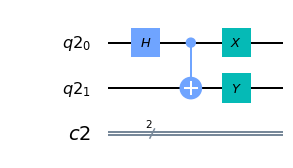

In [24]:
qr00 = QuantumRegister(2)
cr00 = ClassicalRegister(2)
Bell00 = QuantumCircuit(qr00, cr00)
Bell00.h(0)
Bell00.cx(0,1)
Bell00.x(0)
Bell00.y(1)
Bell00.draw(output='mpl')

Now, let's run the circuit on the `statevector_simulator` and print the resulting state vector as a column vector. 

In [25]:
backend = Aer.get_backend('statevector_simulator') 
beta00 = execute(Bell00,backend).result().get_statevector()
print(np.matrix(beta00).H)

[[0.+0.70710678j]
 [0.-0.j        ]
 [0.-0.j        ]
 [0.-0.70710678j]]


This output vector (disregarding the global phase factor of $-i$) is indeed

\begin{align}
\frac{|00\rangle - |11\rangle}{\sqrt{2}}.
\end{align}

Now, we can rewrite this as follows,

\begin{align}
\frac{|00\rangle - |11\rangle}{\sqrt{2}} &= \frac{1}{\sqrt{2}}|00\rangle - \frac{1}{\sqrt{2}}|11\rangle \\
&= \frac{1}{\sqrt{2}}|\psi_1\rangle + \frac{1}{\sqrt{2}}|\psi_2\rangle
\end{align}

where

\begin{align}
|\psi_1\rangle &= |00\rangle \\
|\psi_2\rangle &= -|11\rangle.
\end{align}

The corresponding probabilities obtained from the amplitudes are $p_1 = p_2 = (1/\sqrt{2})^2 = 1/2$. So, we can write

\begin{align}
p_1 |\psi_1\rangle \langle \psi_1| &= \frac{1}{2}
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 
\end{pmatrix}\\
p_2 |\psi_2\rangle \langle \psi_2| &= \frac{1}{2}
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 
\end{pmatrix}.
\end{align}

From this we gather that the density matrix after the application of the $X$-gate and $Y$-gate should be, 

\begin{align}
(X \otimes Y)\rho (X \otimes Y)^{\dagger} = 
\begin{pmatrix}
1/2 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1/2
\end{pmatrix}.
\end{align}

Represented in the density matrix notation using $U = X \otimes Y$, let's check that this is actually true. 

\begin{align}
U\rho U^{\dagger} &= \frac{1}{2} (X \otimes Y)|00\rangle \langle 00|(X \otimes Y)^{\dagger} + \frac{1}{2} (X \otimes Y)|11\rangle \langle 11|(X \otimes Y)^{\dagger} \\
&= 
\frac{1}{2}
\begin{pmatrix}
0 & 0 & 0 & -i \\
0 & 0 & i & 0 \\
0 & -i & 0 & 0 \\
i & 0 & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
1 \\ 0 \\ 0 \\ 0
\end{pmatrix}
\begin{pmatrix}
1, & 0, & 0, & 0
\end{pmatrix}
\begin{pmatrix}
0 & 0 & 0 & -i \\
0 & 0 & i & 0 \\
0 & -i & 0 & 0 \\
i & 0 & 0 & 0 
\end{pmatrix}+
\frac{1}{2}
\begin{pmatrix}
0 & 0 & 0 & -i \\
0 & 0 & i & 0 \\
0 & -i & 0 & 0 \\
i & 0 & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
0 \\ 0 \\ 0 \\ 1
\end{pmatrix}
\begin{pmatrix}
0, & 0, & 0, & 1
\end{pmatrix}
\begin{pmatrix}
0 & 0 & 0 & -i \\
0 & 0 & i & 0 \\
0 & -i & 0 & 0 \\
i & 0 & 0 & 0 
\end{pmatrix}\\
&= 
\frac{1}{2}
\begin{pmatrix}
0 & 0 & 0 & -i \\
0 & 0 & i & 0 \\
0 & -i & 0 & 0 \\
i & 0 & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
\end{pmatrix}
\begin{pmatrix}
0 & 0 & 0 & -i \\
0 & 0 & i & 0 \\
0 & -i & 0 & 0 \\
i & 0 & 0 & 0 
\end{pmatrix}+
\frac{1}{2}
\begin{pmatrix}
0 & 0 & 0 & -i \\
0 & 0 & i & 0 \\
0 & -i & 0 & 0 \\
i & 0 & 0 & 0 
\end{pmatrix}
\begin{pmatrix}
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
\end{pmatrix}
\begin{pmatrix}
0 & 0 & 0 & -i \\
0 & 0 & i & 0 \\
0 & -i & 0 & 0 \\
i & 0 & 0 & 0 
\end{pmatrix}\\
\end{align}

Simplifying this we get, 

\begin{align}
\frac{1}{2}
\begin{pmatrix}
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 
\end{pmatrix}+
\frac{1}{2}
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 
\end{pmatrix} &= 
\begin{pmatrix}
1/2 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 0\\
0 & 0 & 0 & 1/2
\end{pmatrix} = \rho. 
\end{align}

So, we do in fact get the same density matrix after conjugating by $U = X \otimes Y$ (i.e. after applying the $X$-gate and $Y$-gate as in the circuit diagram), and for this example, 

\begin{align}
U\rho U^{\dagger} = \rho. 
\end{align}

Let's check this with Python. 

In [26]:
# Define the X and Y gates
X = np.matrix([[0, 1],
               [1, 0]])

Y = np.matrix([[0, -1j],
               [1j, 0]])

# Define U
U = np.kron(X, Y)
print(U)

[[0.+0.j 0.-0.j 0.+0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.-1.j 0.+0.j 0.-0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]]


In [27]:
# Define the state (1/2)|00><00|
b1 = np.dot(uu, uu.H)/2
# Define the state (1/2)|11><11|
b2 = np.dot(dd, dd.H)/2

In [28]:
D = (U*b1)*(U.H) + (U*b2)*(U.H)
print(D)

[[0.5+0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0. +0.j]
 [0. +0.j 0. +0.j 0. +0.j 0.5+0.j]]


This is again 

\begin{align}
\rho = 
\begin{pmatrix}
1/2 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1/2
\end{pmatrix}
\end{align}

as expected. 

## Measurements

We can also represent measurements in the density matrix notation. If we have a set of measurement operators $\{M_m\}$. Let $|\psi_k\rangle$ be the initial state of a quantum system. The probability of getting result $m$ is

\begin{align}
p(m|k) &= \langle \psi_k|M_m^{\dagger}M_m|\psi_k\rangle \\
&= Tr \left(M^{\dagger}_mM_m|\psi_k\rangle \langle \psi_k|\right),
\end{align}

where $Tr$ denotes the trace. The second equality can be obtained using the *Gram-Schmidt* procedure for obtaining an orthonormal basis (using the measurement operators). 

The probability of result $m$ is

\begin{align}
p(m) &= \sum_k p(m|k)p_k\\
&= \sum_k p_k Tr \left(M_m^{\dagger}M_m|psi_k\rangle \langle \psi_k| \right)\\
&= Tr \left(M_m^{\dagger}M_m\rho \right).
\end{align}

We can describe the density operator after obtaining the measurement result $m$, assuming the initial state $|\psi_k\rangle$, is given by

\begin{align}
|\psi_k^m\rangle = \frac{M_m|\psi_k\rangle}{\sqrt{\langle \psi_k|M_m^{\dagger}M_m|\psi_k\rangle}}.
\end{align}

Once a measurement is performed, we get a new *ensemble of states* $|\psi_k^m\rangle$ with corresponding probabilities $p(k|m)$. The corresponding density operator becomes, 

\begin{align}
\rho_m &= \sum_k p(k|m) |\psi_k^m\rangle \langle \psi_k^m| \\
&= \sum_k p(k|m) \frac{M_m|\psi_k\rangle \langle \psi_k|M_m^{\dagger}}{\langle \psi_k|M_m^{\dagger}M_m|\psi_k\rangle}.
\end{align}

Using elementary probability theory, 

\begin{align}
p(k|m) = \frac{p(k,m)}{p(m)} = \frac{p(m|k)p_k}{p(m)}, 
\end{align}

we can write

\begin{align}
\rho_m = \sum_k p(k) \frac{M_m|\psi_k\rangle \langle \psi_k|M_m^{\dagger}}{Tr\left( M_m^{\dagger}M_m \rho \right)}
= \frac{M_m\rho M_m^{\dagger}}{Tr\left(M_m^{\dagger}M_m\rho \right)}.
\end{align}

## Characterization of Density Operators

There is a characterization of density operators that does not rely on an ensemble of state vectors with associated probabilities. The operator $\rho$ is a density operator associated to an ensemble $\{p_k, |\psi_k\rangle \}$ *if and only if* it satisfies the following two conditions:

1. $Tr(\rho) = 1$ (**Trace Condition**),
2. $\rho$ is a positive operator (**Positivity Condition**). 

A positive operator has a somewhat technical definition in terms of *quadratic forms*. In particular, an operator $A$ is [positive](https://ncatlab.org/nlab/show/positive+operator) if the quadratic form given by 

\begin{align}
v \mapsto \langle v, Av \rangle = \langle v|A|v\rangle
\end{align}

is positive for all vectors $v \in \mathbb{H}$ in the Hilbert space.

From this we can *define* a desity matrix without reference to any state vector, as a positive operator with trace $1$. From this, we can formulate quantum physics using the following four postulates. 

1. For ever "*isolated*" physical system there is an associated Hilbert space $\mathbb{H}$ called the **state space**. The quantum system is *completely* described by the density operator, where is the system is in state $\rho_k$ with associated probability $p_k$, then the density operator is $\sum_k p_k\rho_k$. 

2. The evolution of a "*closed*" system is described by a unitary operator, so the state $\rho_2$ at time $t_2$ is obtained from state $\rho_1$ at time $t_1$ by conjugation by some unitary operator $U$, 

\begin{align}
\rho_2 = U \rho_1 U^{\dagger},
\end{align}

3. Measurements are described by a collection of measurement operators $\{M_m\}$ which act on the state space $\mathbb{H}$, where $m$ refers to the outcomes that may occur. If the state is $\rho$ just before a measurement, then the probability that $m$ occurs is

\begin{align}
p(m) = Tr\left( M_m^{\dagger}M_m \rho \right), 
\end{align}

and the state after measurement is, 

\begin{align}
\frac{M_m \rho M_m^{\dagger}}{Tr\left( M_m^{\dagger}M_m \rho \right)}.
\end{align}

Moreover, the measurement operators satisfy the "*completeness equation*"

\begin{align}
\sum_m M_m^{\dagger}M_m = I.
\end{align}

4. The state space of a composite system is the tensor product of the component systems, 

\begin{align}
\mathbb{H}_{total} = \mathbb{H}_1 \otimes \mathbb{H}_2 \otimes \cdots \otimes \mathbb{H}_n.
\end{align}

If each subsystem $\mathbb{H}_k$ is in state $\rho_k$, then the state of $\mathbb{H}_{total} is represented by

\begin{align}
\rho_{total} = \rho_1 \otimes \rho_2 \otimes \cdots \otimes \rho_n. 
\end{align}

This formulation of quantum mechanics is useful if the state of a system is not known or if one needs to described the states of subsystems. 

### Partial Trace

Suppose we have a composite system

\begin{align}
\mathbb{H}_{total} = \mathbb{H}_1 \otimes \mathbb{H}_2 \otimes \cdots \otimes \mathbb{H}_n.
\end{align}

with state given by the density operator 

\begin{align}
\rho_{total} = \rho_1 \otimes \rho_2 \otimes \cdots \otimes \rho_n. 
\end{align}

Suppose, as an example we have $\rho = \rho_1 \otimes \rho_2$. We can define a partial trace over the subsystem $\rho_2$ as

\begin{align}
Tr_{2}(\rho) = \rho_1 \otimes Tr(\rho_2) = \rho_1 \cdot Tr(\rho_2). 
\end{align}

This can be extended to arbitrary subsystems. As an example, let $\rho = \rho_1 \otimes \rho_2 \otimes \rho_3 \otimes \rho_4$. Taking the partial trace over the subsystem for $\rho_2, \rho_4$ we get

\begin{align}
Tr_{2, 4}(\rho) &= \rho_1 \otimes Tr(\rho_2) \otimes \rho_3 \otimes Tr(\rho_4) \\
&= Tr(\rho_2)Tr(\rho_4)\rho_1 \otimes \rho_3.
\end{align}

Notice, the trace of a matrix is a scalar and can be moved in front as a coefficient. This **reduced** density operator is often denote by $\rho^{1, 3}$ to show that the subsystem corresponding to indices $\{1, 3\}$ were *not* traced out in the partial trace. In general, let the index set $\{1, 2, ..., n\}$ be divided into two disjoint subsets $\{i_1, ..., i_r\} \amalg \{j_1, ..., j_s\} = A \amalg B$. Taking the partial trace over $B = \{j_1, ..., j_s\}$ leaves us with the reduced density operator

\begin{align}
\rho^A &= Tr_B(\rho^{AB}) \\
&= Tr(\rho_{j_1})Tr(\rho_{j_2})\cdots Tr(\rho_{j_s})\cdot \rho_{i_1} \otimes \rho_{i_2} \otimes \cdots \otimes \rho_{i_r}. 
\end{align}

## Exercises

1. Let $\beta_{01} = \frac{1}{\sqrt{2}}|01\rangle + \frac{1}{\sqrt{2}}|10\rangle$. This is one of the four Bell states. Let

\begin{align}
|\psi_1\rangle_{01} &= |01\rangle \\
|\psi_2\rangle_{01} &= |10\rangle 
\end{align}

and let $p_1 = p_2 = (1/\sqrt{2})^2 = 1/2$, be the corresponding probabilities obtained from the amplitude $1/\sqrt{2}$. This gives an *ensemble of states* $\{p_k, |\psi_k\rangle \}_{k=1,2}$. Write the density operator corresponding to this ensemble. 

2. Construct a circuit in Qiskit to prepare $\beta_{01}$. 
3. Run the circuit you constructed in Qiskit on the `statevector_simulator` backend and print the resulting state vector as a column (ket) vector. 
4. Write Python code to define the column (ket) vector $|01\rangle$, call it `ud`.  
5. Write Python code to define the column (ket) vector $|10\rangle$, call it `du`.
6. Use the Python code to compute the density matrix corresponding to $\beta_{01}$ using `ud` and `du`. 
7. Repeat (1)-(6) for the Bell state

\begin{align}
|\beta_{10}\rangle &= \frac{|00\rangle -|11\rangle}{\sqrt{2}}.
\end{align}

8. Repeat (1)-(6) for the Bell state

\begin{align}
|\beta_{11}\rangle &= \frac{|01\rangle -|10\rangle}{\sqrt{2}}.
\end{align}

9. Use the following $W$-state to create a density matrix in Python. 

\begin{align}
\frac{|001\rangle + |010\rangle + |100\rangle}{\sqrt{3}}.
\end{align}

The three states will be

\begin{align}
|\psi_1\rangle &= |001\rangle \\
|\psi_2\rangle &= |010\rangle \\
|\psi_3\rangle &= |100\rangle
\end{align}

and the amplitude $1/\sqrt{3}$ for each of these states gives the associated probabilities $p_1 = p_2 = p_3 = 1/3$. You can name the three column (ket) vectors `uud`, `udu`, and `duu`. Use this information to define the density matrix

\begin{align}
\rho_W = \sum_{k=1}^3 p_k |\psi_k \rangle \langle \psi_k|. 
\end{align}

Define the following density matrices, 

\begin{align}
\rho_1 = 
\begin{pmatrix}
1/2 & 0 \\
0 & 1/2
\end{pmatrix}, \quad
\rho_2 = 
\begin{pmatrix}
5/6 & 1/6 \\
1/6 & 1/6
\end{pmatrix}.
\end{align}

10. Compute $\rho = \rho_1 \otimes \rho_2$. 
11. Compute $Tr_2(\rho)$. 
12. Compute $Tr_1(\rho)$. 
13. Determine if $\rho_1$ is pure by computing $Tr(\rho_1^2)$. 
14. Determine if $\rho_2$ is pure by computing $Tr(\rho_2^2)$. 
15. Determine if $\rho = |0\rangle \langle 0|$ is pure by computing $Tr(\rho^2)$. 
16. Determine if $\rho = |1\rangle \langle 1|$ is pure by computing $Tr(\rho^2)$. 

## References

- [The Road to Reality; Roger Penrose](https://www.amazon.com/Road-Reality-Complete-Guide-Universe/dp/0679776311)
- [Quantum Computation and Quantum Information; Nielsen & Chuang](https://www.amazon.com/Quantum-Computation-Information-10th-Anniversary/dp/1107002176)